In [168]:
import numpy as np
import pandas as pd
import os

In [169]:
# loop through all files in "data/good_data" and concatenta them into one dataframe
df = pd.concat([pd.read_csv(f"data/good_data/{file}") for file in os.listdir("data/good_data")])


In [170]:
# drop all columns except for "common_name" "longitude_coordinate" "latitude_coordinate" "condition" "native"
df = df[["condition", 
        #  "common_name", 
         "longitude_coordinate", "latitude_coordinate", "native"]]
print(df.shape)
df.head()

(777210, 4)


,condition,longitude_coordinate,latitude_coordinate,native
0,poor,-97.736905,30.273151,naturally_occurring
1,fair,-97.736577,30.273910,naturally_occurring
2,poor,-97.736597,30.273360,naturally_occurring
3,poor,-97.736319,30.273816,naturally_occurring
4,fair,-97.736167,30.273598,naturally_occurring


<Axes: title={'center': 'Count of occurence of each tree species in dataset'}, xlabel='Tree Species', ylabel='Count'>

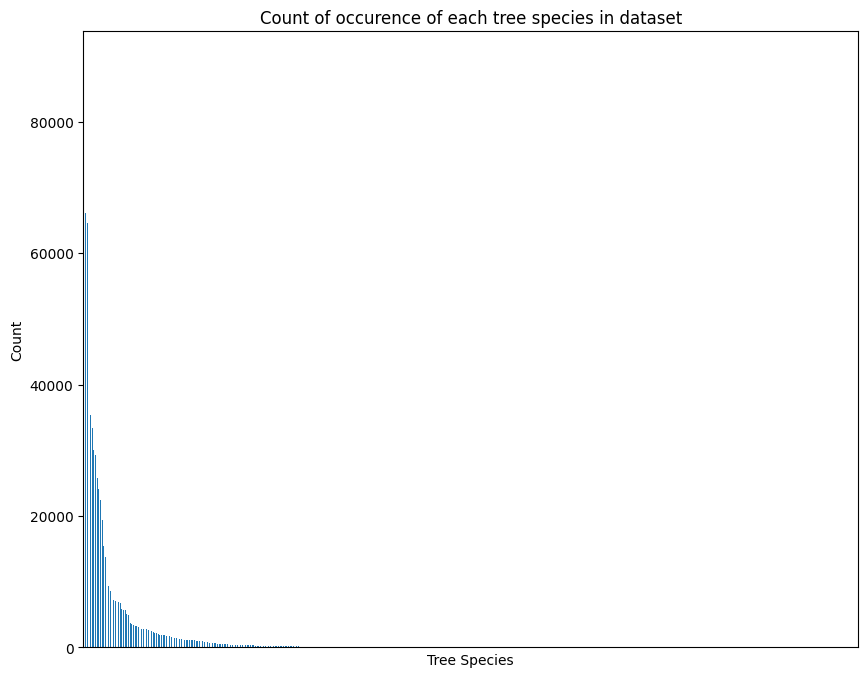

In [161]:
# make a histogram of the count of each label in common_name column
df.common_name.value_counts().plot(kind='bar', figsize=(10,8), 
                                   title="Count of occurence of each tree species in dataset", 
                                   xticks=([]),
                                   ylabel="Count", xlabel="Tree Species")

<Axes: >

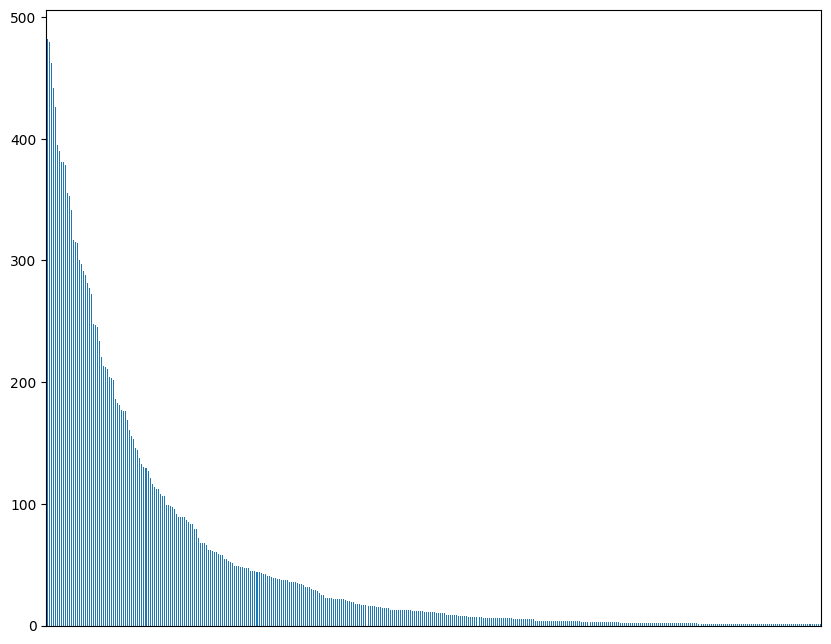

In [162]:
# plot number of occurences in common_name column if they occur less than 500 times on histogram
df.common_name.value_counts()[df.common_name.value_counts() < 500].plot(kind='bar', figsize=(10,8), xticks=([]))

In [163]:
# create a list of common_name labels that occur less than 150 times in the dataset
cut_off = 500
labels_to_drop = df.common_name.value_counts()[df.common_name.value_counts() < cut_off].index.tolist()
print(len(labels_to_drop))

384


In [164]:
# replace all labels in common_name that occur in labels_to_drop with "other"
df.common_name = df.common_name.apply(lambda x: "other" if x in labels_to_drop else x)

In [165]:
# count unique values in common_name column
df.common_name.value_counts()

# rank the labels in common_name column by count
df.common_name.value_counts().rank()

# # return the common_name and count for the 100th most common label
# df.common_name.value_counts().index[99], df.common_name.value_counts()[99]

London planetree       87.0
Callery pear           86.0
Honeylocust            85.0
Pin oak                84.0
Norway maple           83.0
                       ... 
Escarpment live oak     5.0
Common baldcypress      4.0
Paper birch             3.0
Catalpa                 2.0
Shumard oak             1.0
Name: common_name, Length: 87, dtype: float64

In [171]:
# # one hot "common_name" column
# df = pd.get_dummies(df, columns=["common_name"])

# one hot 'condition' column
df['condition'] = df['condition'].replace({'excellent': 4, 'good': 3, 'fair': 2, 'poor': 1, 'dead/dying': 0, 'dead': 0})

# one hot native column
df = pd.get_dummies(df, columns=["native"])

# drop native_no_info column
df.drop(columns=['native_no_info'], inplace=True)

# drop rows where condition is null
df = df.dropna(subset=['condition'])

print(df.shape)
df.head()

(744034, 5)


,condition,longitude_coordinate,latitude_coordinate,native_introduced,native_naturally_occurring
0,1.0,-97.736905,30.273151,0,1
1,2.0,-97.736577,30.273910,0,1
2,1.0,-97.736597,30.273360,0,1
3,1.0,-97.736319,30.273816,0,1
4,2.0,-97.736167,30.273598,0,1


In [172]:
# save to csv
df.to_csv("no_species_processed_data.csv", index=False)